<a href="https://colab.research.google.com/github/Swicano/IntroML_NBs/blob/master/MachineLearningSimpleTrigFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(7)

In [0]:
T = 1000000
X = np.array(range(T))
X = np.arange(-1,1,0.0001)
Y = 0.5 * np.sin(10*np.pi*X) + 0.0 * np.sin(20*np.pi*X) - 0.0 * np.sin(15*np.pi*X)
x_train =X[:int(0.8*len(X))]
x_val =X[int(0.8*len(X)):]
y_train =Y[:int(0.8*len(X))]
y_val =Y[int(0.8*len(X)):]

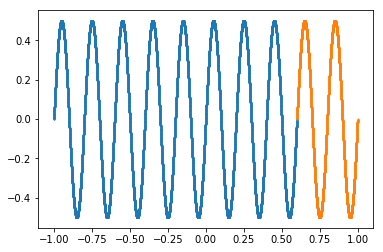

In [0]:
plt.scatter(x_train, y_train, s = 1)
plt.scatter(x_val, y_val, s = 1)
plt.show()

In [0]:
model = Sequential()
model.add(Dense(100, input_dim = 1, activation = 'softplus', kernel_initializer = 'glorot_normal', bias_initializer='zeros'))
model.add(Dense(50, activation = 'softplus', kernel_initializer = 'glorot_normal', bias_initializer='zeros'))
model.add(Dense(2, activation = 'softplus', kernel_initializer = 'glorot_normal', bias_initializer='zeros'))
model.add(Dense(50, activation = 'softplus', kernel_initializer = 'glorot_normal', bias_initializer='zeros'))
model.add(Dense(100, activation = 'softplus', kernel_initializer = 'glorot_normal', bias_initializer='zeros'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [0]:
#earlyStop = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100, verbose = 1, mode = 'min')
history = model.fit(x_train, y_train, batch_size=100, epochs = 500, validation_data=(x_val,y_val),
                    verbose = 2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/500
 - 2s - loss: 0.1305 - val_loss: 0.1263
Epoch 2/500
 - 0s - loss: 0.1272 - val_loss: 0.1234
Epoch 3/500
 - 0s - loss: 0.1262 - val_loss: 0.1322
Epoch 4/500
 - 0s - loss: 0.1263 - val_loss: 0.1238
Epoch 5/500
 - 0s - loss: 0.1257 - val_loss: 0.1278
Epoch 6/500
 - 0s - loss: 0.1252 - val_loss: 0.1227
Epoch 7/500
 - 0s - loss: 0.1262 - val_loss: 0.1263
Epoch 8/500
 - 0s - loss: 0.1258 - val_loss: 0.1299
Epoch 9/500
 - 0s - loss: 0.1261 - val_loss: 0.1311
Epoch 10/500
 - 0s - loss: 0.1287 - val_loss: 0.1256
Epoch 11/500
 - 0s - loss: 0.1271 - val_loss: 0.1287
Epoch 12/500
 - 0s - loss: 0.1267 - val_loss: 0.1227
Epoch 13/500
 - 0s - loss: 0.1270 - val_loss: 0.1241
Epoch 14/500
 - 0s - loss: 0.1264 - val_loss: 0.1257
Epoch 15/500
 - 0s - loss: 0.1258 - val_loss: 0.1227
Epoch 16/500
 - 0s - loss: 0.1252 - val_loss: 0.1293
Epoch 17/500
 - 0s - loss: 0.1268 - val_loss: 0.1245
Epoch 18/500
 - 0s - loss: 0.1260 - val_loss: 0.1237
Epoch 

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,loss,epoch
495,0.180861,0.043893,495
496,0.205294,0.043978,496
497,0.130452,0.044038,497
498,0.172624,0.044095,498
499,0.163999,0.043946,499


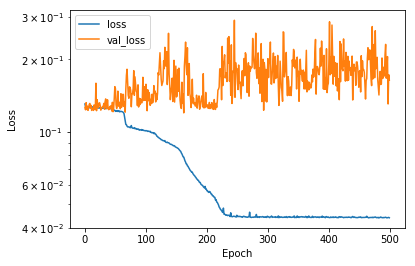

In [0]:
def plotHistory(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
             label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],
             label = 'val_loss')
    #plt.ylim([0,5])
    plt.legend()
    plt.yscale('log')
    plt.show()

plotHistory(history)

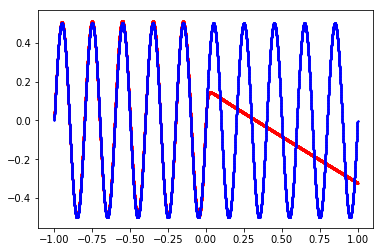

In [0]:
prediction = model.predict(X)
x_plot = X
plt.scatter(x_plot, prediction, s = 1, c = 'r')
plt.scatter(x_plot, Y, s = 1, c = 'b')
plt.show()